<a href="https://colab.research.google.com/github/andreykoz82/sampling_raspberry/blob/main/%D1%80%D0%B0%D1%81%D1%87%D0%B5%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# РАСЧЕТ ОБЪЕМА ВЫБОРКИ ГОТОВОЙ ПРОДУКЦИИ
[ссылка на источник](http://vestnik.mednet.ru/content/view/1123/27/lang,ru/) <br>
[онлайн калькулятор выборки](https://socioline.ru/rv.php)

$n = \frac{t^2\cdot P\cdot Q\cdot N}{\Delta^2\cdot N + t^2\cdot P\cdot Q}$, где
<br>
<br>
$t^2$ - критическое значение критерия Стьюдента при соответствующем уровне значимости (как правило в медицинских исследованиях используется в качестве критического используется уровень значимости 0.05, то при таком уровне значимости $t^2$ - 1.96);
<br>
$\Delta$ - предельно допустимая ошибка (в медицинских исследованиях как правило 5%)
<br>
$N$ - объем генеральной совокупности
<br>
$P$ - доля случаев, в которых встречается изучаемый признак
<br>
$Q$ - доля случаев, в которых не встречается изучаемый признак $(100-𝑃)$



---





Импорт необходимых библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Создаем функцию для расчета объема выборки, используя формулу, описанную выше

In [ ]:
def sample_size(N, t = 1.96, delta = 5, P = 50):
  Q = 100 - P
  n = (t**2*P*Q*N)/(delta**2*N+t**2*P*Q)
  n = n // 1
  return n

Проверяем результат для размера серии 1000 шт.

In [ ]:
print("Объем выборки: ", sample_size(1000))

Объем выборки:  277.0


Создаем массив объема серий ГП: от 1000 шт. до 300 000 шт. с шагом 1000 шт.

In [ ]:
N = np.arange(1000, 300000, 1000)

Построим график зависимости объема выборки от размера серии ГП

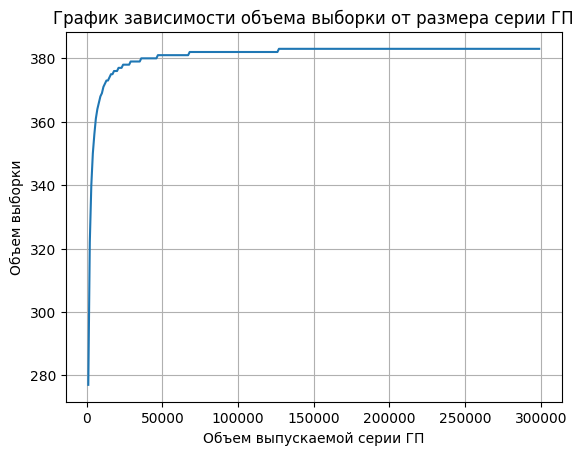

In [ ]:
plt.plot(N, sample_size(N))
plt.xlabel('Объем выпускаемой серии ГП')
plt.ylabel('Объем выборки')
plt.title('График зависимости объема выборки от размера серии ГП')
plt.grid()

# РАСЧЕТ ОБЪЕМА ВЫБОРКИ ПО ISO 2859 - 1
[ссылка на документ](https://pppars.com/wp-content/uploads/2021/07/ISO-2859-1-1999.pdf)

Импорт необходимых библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

План общего уровня контроля (объем выборки: [минимальный размер серии, максимальный размер серии]): <br>
Таблица 1 и Таблица 2-А (ISO 2859-1)

In [ ]:
sampling_plan = {
    2: range(2, 9),
    3: range(9, 16),
    5: range(16, 26),
    8: range(26, 51),
    13: range(51, 91),
    20: range(91, 151),
    32: range(151, 281),
    50: range(281, 501),
    80: range(501, 1201),
    125: range(1201, 3201),
    200: range(3201, 10001),
    315: range(10001, 35001),
    500: range(35001, 150001),
    800: range(150001, 500001),
    1250: range(500001, 1000001)
}

Создаем функцию для расчета объема выборки, используя план контроля:

In [ ]:
def sample_size_iso(N):
  for k,v in sampling_plan.items():
    if N in v:
      return k

Проверяем результат для размера серии 1000 шт.

In [ ]:
print("Объем выборки: ", sample_size_iso(1000))

Объем выборки:  80


Построим график зависимости объема выборки от размера серии ГП

Создаем массив объема серий ГП: от 1000 шт. до 300 000 шт. с шагом 1000 шт.

In [ ]:
N = np.arange(1000, 300000, 1000)

In [ ]:
lot_size = []
for lot in N:
  lot_size.append(sample_size_iso(lot))

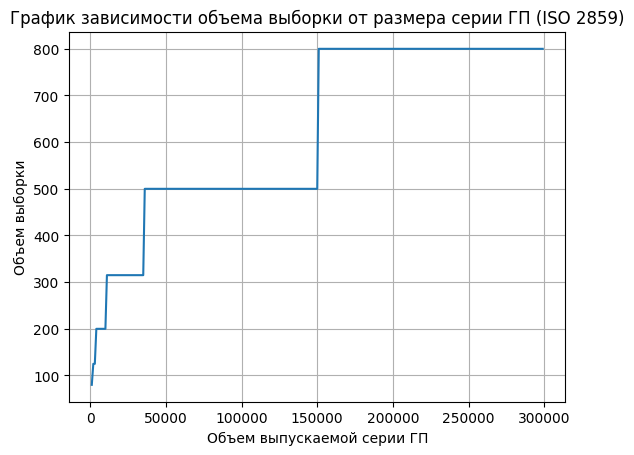

In [ ]:
plt.plot(N, lot_size)
plt.xlabel('Объем выпускаемой серии ГП')
plt.ylabel('Объем выборки')
plt.title('График зависимости объема выборки от размера серии ГП (ISO 2859)')
plt.grid()

# ВАЛИДАЦИЯ ПРОЦЕССА ОТБОРА ПРОБ

Для проведения валидации процесса отбора проб, было выбрано 3 производственных серии готовой продукции. В процессе производства, система производила отбор пачек с готовой продукции с конвейера , согласно плану отбора образцов по ISO 2859-1. <br>
Валидация проводится следующим образом: <br>
1. Сканируем коды маркировки с отобранных пачек
2. Получаем данные о времени и дате, когда принтер запросил данные коды
3. Анализируем равномерность отбора проб с конвейера

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/KLS/Объем выборки')

## Фп Чабрец трава 20x1,5 г
**Производственное задание**: ПР200000761 <br>
**Серия**: 70923

In [ ]:
thyme = pd.read_excel('Валидация отбора проб.xlsx', sheet_name = 'Чабрец')

Коды маркировки и время отправки на принтер:

In [ ]:
thyme.head()

,code,date
0,010460149800717321CLO6E6EVS0B0P91EE09928KhXOsG...,2023-09-12 23:00:00
1,010460149800717321GUMHXJEVH0K0P91EE0992qktVHTK...,2023-09-12 22:50:33
2,0104601498007173219RO4X55VM080Y91EE0992MFASuuj...,2023-09-12 23:02:38
3,0104601498007173215YSUIBMVY030C91EE0992MF7PDwz...,2023-09-12 23:24:11
4,0104601498007173213IC2LNMVK0N0P91EE0992vHv632X...,2023-09-12 23:00:00


In [ ]:
thyme['date'] = pd.to_datetime(thyme['date'])

Отсортируем данные по времени:

In [ ]:
thyme = thyme.sort_values(by='date')

Расчитаем разницу между временем печати двух кодов

In [ ]:
thyme['time_diff'] = thyme['date'].diff()
thyme['tot_sec_diff'] = thyme['time_diff'] / pd.Timedelta(seconds=1)

Построим гистрограмму распределения разницы во времени:

In [ ]:
px.histogram(thyme, x="tot_sec_diff")

In [ ]:
px.bar(thyme['date']).update_traces(width = 50000)

## Фп Сб. Желудочный №3 20x2,0г
**Производственное задание**: ПР200000763 <br>
**Серия**: 80923

In [ ]:
mix_zhel = pd.read_excel('Валидация отбора проб.xlsx', sheet_name = 'Желудочный')

Коды маркировки и время отправки на принтер:

In [ ]:
mix_zhel.head()

,code,date
0,010460149800503221VZRU42MIM0J0I91EE0992O290YaW...,2023-09-13 11:21:41
1,010460149800503221JIN4R2FIC0G0Q91EE0992KEe0Gph...,2023-09-13 11:24:38
2,010460149800503221RF7VA0JIB0D0D91EE0992OrdLs8s...,2023-09-13 11:23:12
3,010460149800503221QNUWG0HI90Q0T91EE0992ycQDhl5...,2023-09-13 11:26:04
4,010460149800503221ZI6ZH0JIM080C91EE0992UMk2N5Q...,2023-09-13 11:24:38


Отсортируем данные по времени:

In [ ]:
mix_zhel['date'] = pd.to_datetime(mix_zhel['date'])
mix_zhel = mix_zhel.sort_values(by='date')

Расчитаем разницу между временем печати двух кодов

In [ ]:
mix_zhel['time_diff'] = mix_zhel['date'].diff()
mix_zhel['tot_sec_diff'] = mix_zhel['time_diff'] / pd.Timedelta(seconds=1)

Построим гистрограмму распределения разницы во времени:

In [ ]:
px.histogram(mix_zhel, x="tot_sec_diff")

In [ ]:
px.bar(mix_zhel['date'])

## Фп Мелисса лекарственная трава 20x1,5г
**Производственное задание**: ПР200000765 <br>
**Серия**: 110923

In [ ]:
melissa = pd.read_excel('Валидация отбора проб.xlsx', sheet_name = 'Мелисса')

Коды маркировки и время отправки на принтер:

In [ ]:
melissa.head()

,code,date
0,0460149800063112ZAI0CP90K0Q,2023-09-13 14:36:31
1,046014980006311OF67ZHO10802,2023-09-13 14:23:38
2,046014980006311Q7N227PA0V02,2023-09-13 13:53:01
3,046014980006312C9Z70RP50Y0U,2023-09-13 14:04:05
4,046014980006312GYV713PI020H,2023-09-13 14:13:59


Отсортируем данные по времени:

In [ ]:
melissa['date'] = pd.to_datetime(melissa['date'])
melissa = melissa.sort_values(by='date')

Расчитаем разницу между временем печати двух кодов

In [ ]:
melissa['time_diff'] = melissa['date'].diff()
melissa['tot_sec_diff'] = melissa['time_diff'] / pd.Timedelta(seconds=1)

Построим гистрограмму распределения разницы во времени:

In [ ]:
px.histogram(melissa, x="tot_sec_diff")

In [ ]:
px.bar(melissa['date']).update_traces(width = 50000)